In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('USA_Housing.csv')

# Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [4]:
pt = PowerTransformer()
df_n = pd.DataFrame(df[['Avg. Area Income','Avg. Area House Age','Area Population'
                                         ,'Avg. Area Number of Rooms']]
                    , columns = ['Avg. Area Income','Avg. Area House Age'
                                 ,'Area Population','Avg. Area Number of Rooms'])

df_n = df_n.merge(df.Price,left_index = True,right_index = True)

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(df_n.iloc[:,:-1], df_n.Price, test_size=0.3)

In [6]:
model = LinearRegression(normalize = True)

In [7]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

# SHAP

In [8]:
import shap
shap.initjs()

In [9]:
X_test_samp = shap.sample(X_test, 90)

In [10]:
explainer = shap.KernelExplainer(model.predict, X_test_samp)

shap_values = explainer.shap_values(X_test_samp, nsample = 50)

  0%|          | 0/90 [00:00<?, ?it/s]

# Feature Importance Summary

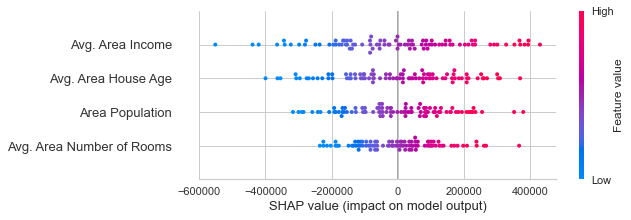

In [11]:
shap.summary_plot(shap_values, X_test_samp)

# Dependence Plot

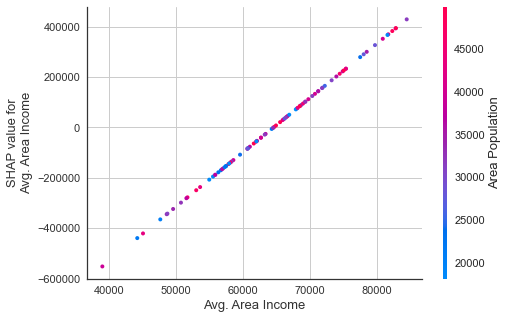

In [12]:
shap.dependence_plot('Avg. Area Income',shap_values, X_test_samp)

# Force Plot

### Individual

In [13]:
i = 45 #instance num

In [14]:
explainer.expected_value

1091033.3252832205

In [15]:
model.predict(X_test_samp).mean()

1091033.3252832207

In [16]:
shap.force_plot(explainer.expected_value, shap_values[i], X_test_samp.iloc[i])

### Collective

In [17]:
shap.force_plot(explainer.expected_value, shap_values, X_test_samp)